Fashion MNIST는 keras 데이터셋에서 불러온다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# 데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist

AttributeError: ignored

In [ ]:
from tensorflow.keras import datasets
mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
image = X_train[0]
image.shape

(28, 28)

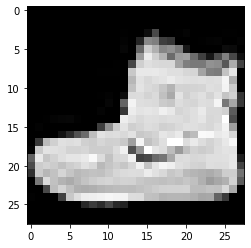

In [ ]:
plt.imshow(image, 'gray')
plt.show()

In [17]:
# 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [29]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation = 'relu', input_shape = (784, )))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

modelcheckpoint =    ModelCheckpoint('best_model.h5', 
                     monitor='val_acc', 
                     mode='max', 
                     verbose=1,
                     save_best_only=True)

# 모델 컴파일
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

# 훈련
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=30,
    callbacks=[modelcheckpoint],
    validation_data=(X_test, y_test)
)

Epoch 1/30
468/469 [============================>.] - ETA: 0s - loss: 0.5130 - acc: 0.8163
Epoch 00001: val_acc improved from -inf to 0.84600, saving model to best_model.h5
469/469 [==============================] - 6s 13ms/step - loss: 0.5127 - acc: 0.8164 - val_loss: 0.4288 - val_acc: 0.8460
Epoch 2/30
469/469 [==============================] - ETA: 0s - loss: 0.3620 - acc: 0.8667
Epoch 00002: val_acc improved from 0.84600 to 0.85430, saving model to best_model.h5
469/469 [==============================] - 6s 12ms/step - loss: 0.3620 - acc: 0.8667 - val_loss: 0.4015 - val_acc: 0.8543
Epoch 3/30
468/469 [============================>.] - ETA: 0s - loss: 0.3257 - acc: 0.8799
Epoch 00003: val_acc improved from 0.85430 to 0.87240, saving model to best_model.h5
469/469 [==============================] - 6s 13ms/step - loss: 0.3256 - acc: 0.8799 - val_loss: 0.3557 - val_acc: 0.8724
Epoch 4/30
468/469 [============================>.] - ETA: 0s - loss: 0.3037 - acc: 0.8868
Epoch 00004: val_a

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
________________________________________________